In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# set the file path
file_path = r"D:\Hertfordshire\Applied data science\England_Regions_COVID_Dataset.csv"

# read the CSV file using Pandas
df = pd.read_csv(file_path)

# display the first 5 rows of the DataFrame
print(df.head())

         Date    areaName  newCasesByPublishDate  cumCasesByPublishDate  \
0  11/03/2020  South West                    NaN                    NaN   
1  12/03/2020  South West                    NaN                    NaN   
2  13/03/2020  South West                    NaN                    NaN   
3  14/03/2020  South West                    NaN                    NaN   
4  15/03/2020  South West                    NaN                    NaN   

   newDeaths28DaysByPublishDate  cumDeaths28DaysByPublishDate  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

   cumDeaths28DaysByPublishDateRate  newDeaths28DaysByDeathDate  \
0                               NaN                         1.0   
1                       

In [2]:
# read the CSV file using Pandas
df = pd.read_csv(file_path)

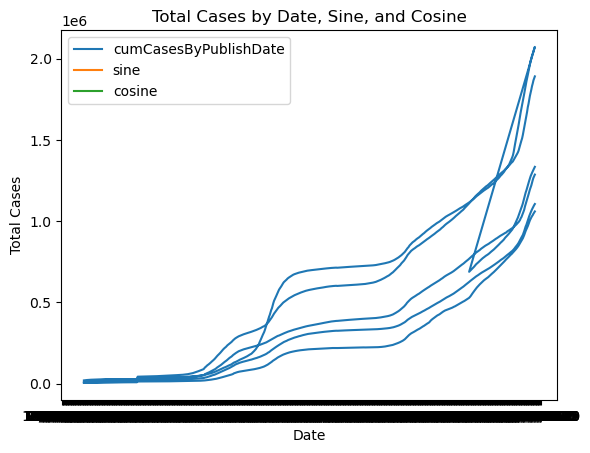

In [3]:
# define the function to create a line plot
def lineplot(df, headers):
    """
    This function creates a line plot for a given dataframe and list of headers.
    It plots each column as a line on the same plot.
    """
    # create a figure object
    fig, ax = plt.subplots()

    # iterate over the headers list and plot each column as a line
    for head in headers:
        if head == 'cumCasesByPublishDate':
            ax.plot(df['Date'], df[head], label=head)
        elif head == 'sine':
            x = pd.to_numeric(df['Date'], errors='coerce')
            y = np.sin(x)
            ax.plot(x, y, label=head)
        elif head == 'cosine':
            x = pd.to_numeric(df['Date'], errors='coerce')
            y = np.cos(x)
            ax.plot(x, y, label=head)

    # set x and y labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Cases')
    ax.set_title('Total Cases by Date, Sine, and Cosine')

    # show the legend
    ax.legend()

    # show the plot
    plt.show()

# call the lineplot function with the data and headers to plot
lineplot(df, ['cumCasesByPublishDate', 'sine', 'cosine'])

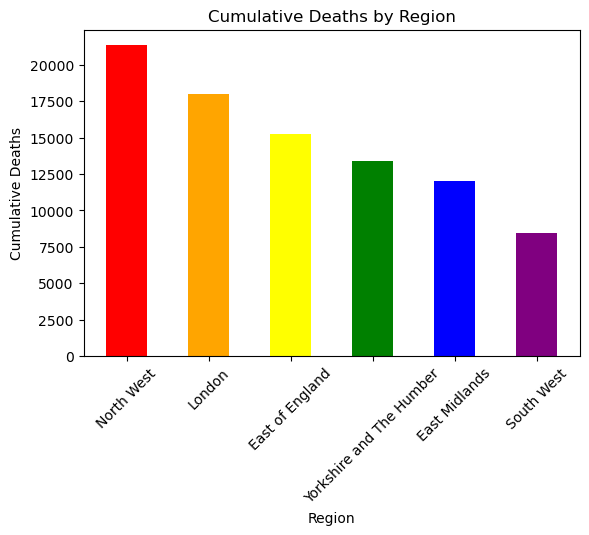

In [4]:
# define a function to create a bar chart of cumulative deaths by region
def cumulative_deaths_by_region():
    # create a grouped DataFrame of cumulative deaths by region
    grouped_df = df.groupby('areaName')['cumDeaths28DaysByDeathDate'].max().reset_index()
    
    # sort the DataFrame by cumulative deaths
    sorted_df = grouped_df.sort_values('cumDeaths28DaysByDeathDate', ascending=False)
    
    # define custom colors for the bars
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'black']
    
    # set the width and spacing of the bars
    bar_width = 0.5
    bar_spacing = 0.05
    
    # create a bar chart of the top 10 regions with the most cumulative deaths
    plt.bar(sorted_df['areaName'][:10], sorted_df['cumDeaths28DaysByDeathDate'][:10],
            color=colors, width=bar_width, align='center')
    plt.xlabel('Region')
    plt.ylabel('Cumulative Deaths')
    plt.title('Cumulative Deaths by Region')
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.2)
    plt.show()

# call the function to display the graph
cumulative_deaths_by_region()

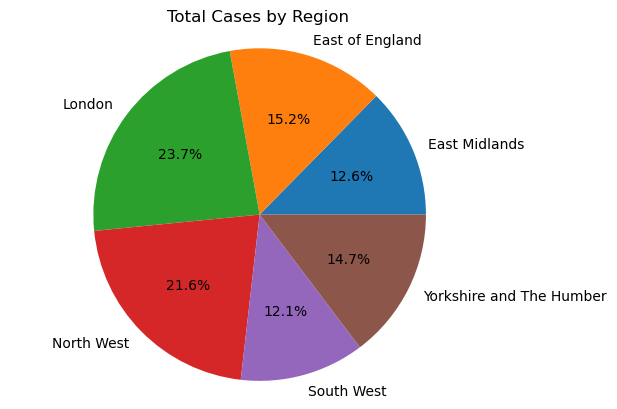

In [5]:
# define a function to create a pie chart of total cases by region
def total_cases_by_region():
    # create a DataFrame of total cases by region
    grouped_df = df.groupby('areaName')['cumCasesByPublishDate'].max().reset_index()
    
    # create a pie chart of total cases by region
    plt.pie(grouped_df['cumCasesByPublishDate'], labels=grouped_df['areaName'], autopct='%1.1f%%')
    plt.title('Total Cases by Region')
    plt.axis('equal')
    plt.show()

# call the function to display the graph
total_cases_by_region()